<a href="https://colab.research.google.com/github/mas1996oud/Ethereum_LSTM/blob/main/Ethereum_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

import warnings
warnings.filterwarnings('ignore')


In [2]:
df= pd.read_csv('/content/drive/MyDrive/Datasets/ETH_daily.csv')
df.head()

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
0,2020-04-15,ETHUSD,158.61,158.61,158.61,158.61,0.00,0.00
1,2020-04-14,ETHUSD,156.97,162.15,155.74,158.61,18061.58,2872210.44
2,2020-04-13,ETHUSD,158.56,159.51,150.12,156.97,15698.32,2416728.28
3,2020-04-12,ETHUSD,158.66,165.37,155.21,158.56,12877.33,2082804.05
4,2020-04-11,ETHUSD,158.26,161.49,154.25,158.66,13761.72,2172914.57


In [3]:
data = pd.DataFrame(list(df['Close']), index=df['Date'], columns=['Price'])
data

,Price
Date,
2020-04-15,158.61
2020-04-14,158.61
2020-04-13,156.97
2020-04-12,158.56
2020-04-11,158.66
...,...
2016-05-13,10.69
2016-05-12,10.20
2016-05-11,10.43


In [4]:
# prompt: sort date index of data variable be acsending

data = data.sort_index(ascending=True)
data


,Price
Date,
2016-05-09,9.98
2016-05-10,9.68
2016-05-11,10.43
2016-05-12,10.20
2016-05-13,10.69
...,...
2020-04-11,158.66
2020-04-12,158.56
2020-04-13,156.97


In [5]:
df=data[:365]
df.shape

(365, 1)

In [6]:
df.isnull().sum()

,0
Price,0


In [9]:
df=df['Price'].values
df

array([ 9.98,  9.68, 10.43, 10.2 , 10.69, 10.25, 10.06, 11.37, 12.23,
       13.3 , 14.5 , 13.9 , 13.97, 14.2 , 13.55, 12.82, 12.53, 12.6 ,
       11.39, 11.81, 12.53, 12.66, 14.18, 13.95, 13.9 , 14.02, 13.86,
       13.91, 14.16, 14.5 , 14.51, 14.47, 13.97, 14.11, 15.75, 17.64,
       18.92, 18.39, 20.95, 15.65, 11.42, 12.59, 11.85, 12.8 , 13.43,
       13.76, 14.14, 14.49, 13.82, 15.29, 12.26, 12.95, 12.5 , 12.26,
       12.09, 11.89, 11.45, 10.69, 11.  , 10.1 , 11.57, 11.09, 11.13,
       10.83, 10.87, 10.76, 11.52, 12.2 , 10.2 , 11.32, 11.15, 11.97,
       12.65, 13.09, 14.74, 14.45, 12.34, 13.75, 12.24, 13.34, 13.29,
       12.98, 12.75, 11.91, 11.24,  8.52, 10.44, 11.64, 11.42, 11.03,
       11.01, 11.5 , 12.38, 12.35, 11.75, 11.89, 11.73, 11.21, 11.36,
       11.34, 10.84, 10.84, 10.8 , 11.05, 11.28, 11.36, 11.07, 11.02,
       11.22, 11.32, 11.3 , 11.09, 11.08, 11.3 , 11.5 , 12.43, 12.15,
       12.  , 11.8 , 11.98, 11.74, 11.69, 11.48, 11.62, 11.98, 11.73,
       11.88, 11.93,

In [10]:
df=df.reshape(-1,1)

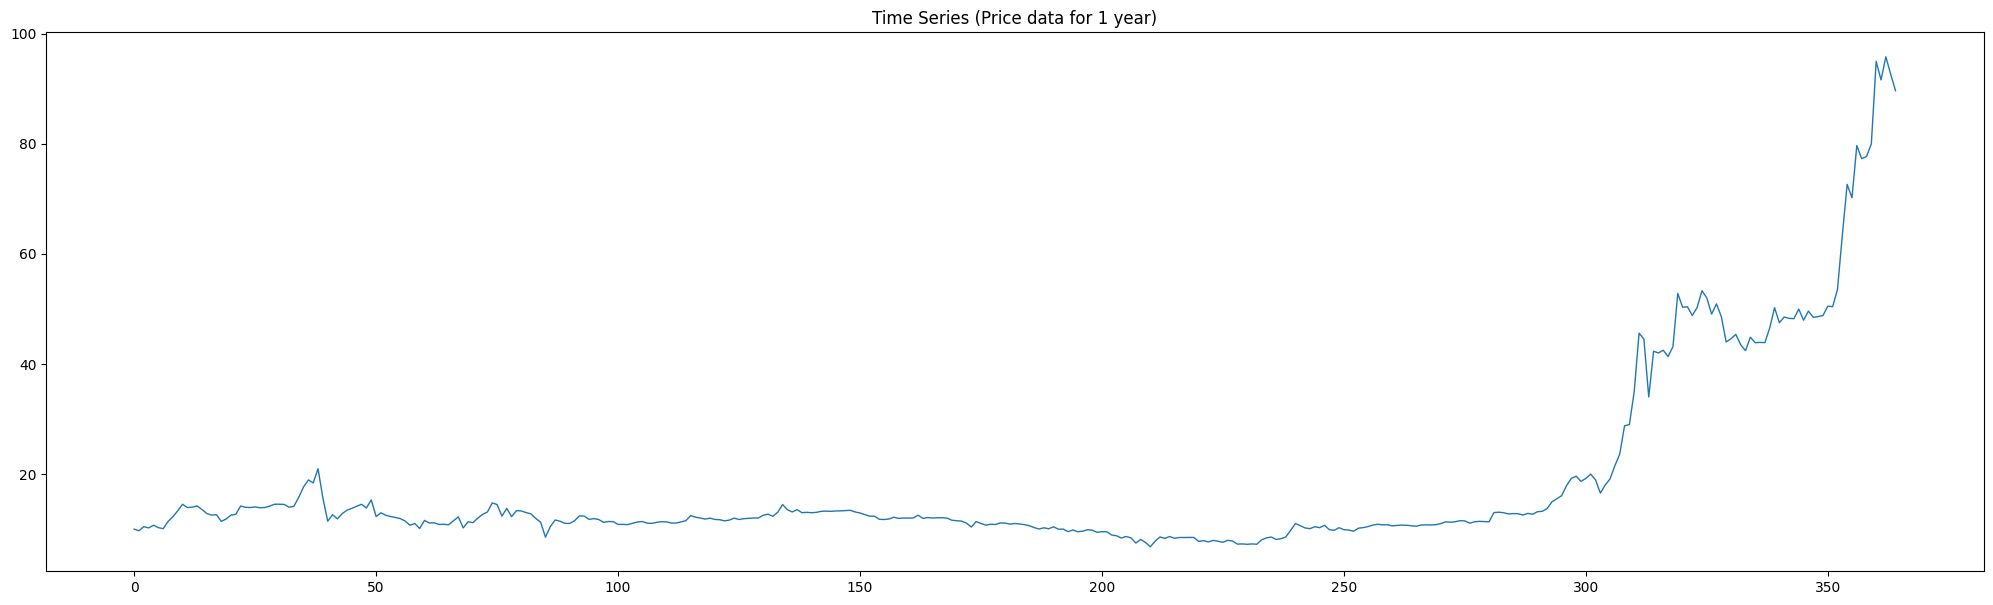

In [11]:
plt.figure(figsize=(25, 7))
plt.plot(df, linewidth=1)
plt.title("Time Series (Price data for 1 year)")
plt.show()

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df)
data_scaled

array([[0.03603907],
       [0.03267093],
       [0.04109128],
       [0.03850904],
       [0.04401033],
       [0.03907039],
       [0.03693724],
       [0.05164477],
       [0.0613001 ],
       [0.07331312],
       [0.08678567],
       [0.0800494 ],
       [0.0808353 ],
       [0.08341754],
       [0.07611991],
       [0.0679241 ],
       [0.06466824],
       [0.06545414],
       [0.05186932],
       [0.05658471],
       [0.06466824],
       [0.06612776],
       [0.08319299],
       [0.08061076],
       [0.0800494 ],
       [0.08139665],
       [0.07960031],
       [0.08016167],
       [0.08296845],
       [0.08678567],
       [0.08689795],
       [0.08644886],
       [0.0808353 ],
       [0.0824071 ],
       [0.10081958],
       [0.12203885],
       [0.13640957],
       [0.13045919],
       [0.15920063],
       [0.09969687],
       [0.05220613],
       [0.06534187],
       [0.05703379],
       [0.06769956],
       [0.07477265],
       [0.0784776 ],
       [0.08274391],
       [0.086

In [13]:
data_scaled.shape

(365, 1)

In [14]:
def create_sequence(data, window_size):
  window_size= 30
  input = []
  output = []
  for i in range(len(data) - (window_size)):
      input.append(data[i:i+window_size])
      output.append(data[i+window_size])
  return input, output

window_size= 30
input, output=create_sequence(data_scaled, window_size)

In [15]:
print(np.shape(input))
print(np.shape(output))

(335, 30, 1)
(335, 1)


In [16]:
input[1]

array([[0.03267093],
       [0.04109128],
       [0.03850904],
       [0.04401033],
       [0.03907039],
       [0.03693724],
       [0.05164477],
       [0.0613001 ],
       [0.07331312],
       [0.08678567],
       [0.0800494 ],
       [0.0808353 ],
       [0.08341754],
       [0.07611991],
       [0.0679241 ],
       [0.06466824],
       [0.06545414],
       [0.05186932],
       [0.05658471],
       [0.06466824],
       [0.06612776],
       [0.08319299],
       [0.08061076],
       [0.0800494 ],
       [0.08139665],
       [0.07960031],
       [0.08016167],
       [0.08296845],
       [0.08678567],
       [0.08689795]])

In [17]:
output[1]

array([0.08644886])

In [18]:
input= np.asanyarray(input)
output= np.asanyarray(output)

In [19]:
len(df)*0.7

255.49999999999997

In [20]:
trian_size=int(len(df)*0.7)
type(trian_size)

int

In [21]:
x_train = input[:trian_size,:,:]
x_test = input[trian_size:,:,:]
y_train = output[:trian_size]
y_test= output[trian_size:]

In [22]:
input.shape

(335, 30, 1)

In [23]:
x_train.shape

(255, 30, 1)

In [24]:
x_test.shape

(80, 30, 1)

In [25]:
def show_history(hist):
  best_model_accuracy = hist.history['loss'][np.argmin(hist.history['loss'])]
  print("best loss in this model: ", best_model_accuracy)
  pd.DataFrame(hist.history).plot(figsize=(8,5))
  plt.show()

<h2>Model1: 100epochs, </h2>

In [26]:
model = Sequential()
model.add(LSTM(50, dropout=0.2, activation="tanh", return_sequences= True, input_shape= (window_size,1)))
model.add(LSTM(50, dropout=0.2, activation="tanh", return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 30, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
batch_size=32
epochs=10
history0= model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=epochs, verbose=1, batch_size=batch_size)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 198ms/step - loss: 0.0016 - val_loss: 0.1424
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 5.3662e-04 - val_loss: 0.1479
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 3.8085e-04 - val_loss: 0.1468
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 4.7268e-04 - val_loss: 0.1408
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 4.3060e-04 - val_loss: 0.1293
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 3.4601e-04 - val_loss: 0.1250
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 3.9919e-04 - val_loss: 0.0988
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 4.3970e-04 - val_loss: 0.1148
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 4.5474e-04 - val_loss: 0.1119
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 3.6052e-04 - val_loss: 0.1180


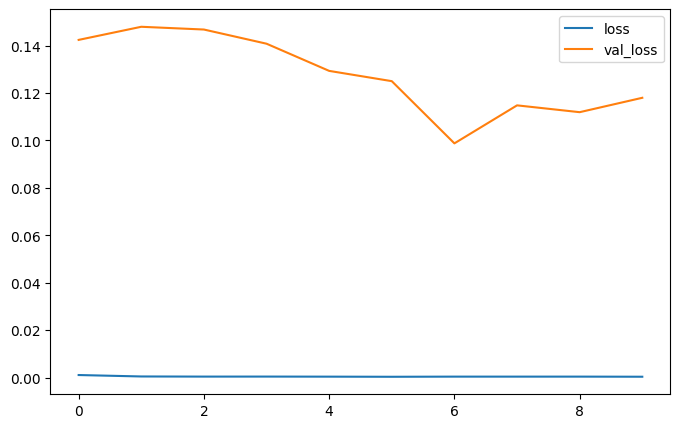

In [28]:
pd.DataFrame(history0.history).plot(figsize=(8,5))
plt.show()

In [29]:
best_model_accuracy = history0.history['loss'][np.argmin(history0.history['loss'])]
print(best_model_accuracy)

0.00035681805456988513


<h2>Model2: 100epochs, </h2>

In [30]:
batch_size=32
epochs=100
history= model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=epochs, verbose=1, batch_size=batch_size)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 3.8334e-04 - val_loss: 0.1137
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 4.3053e-04 - val_loss: 0.1079
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 3.7832e-04 - val_loss: 0.1094
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 3.9971e-04 - val_loss: 0.1032
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 3.8741e-04 - val_loss: 0.1125
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 3.4463e-04 - val_loss: 0.1112
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 4.9424e-04 - val_loss: 0.1033
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 3.2426e-04 - val_loss: 0.1027
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 3.0130e-04 - val_loss: 0.0749
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 3.9438e-04 - val_loss: 0.0840
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 3.9432e-04 - val_loss: 0.0919
Epoch 12/100
8/8 ━━━━━━━━━━━━━

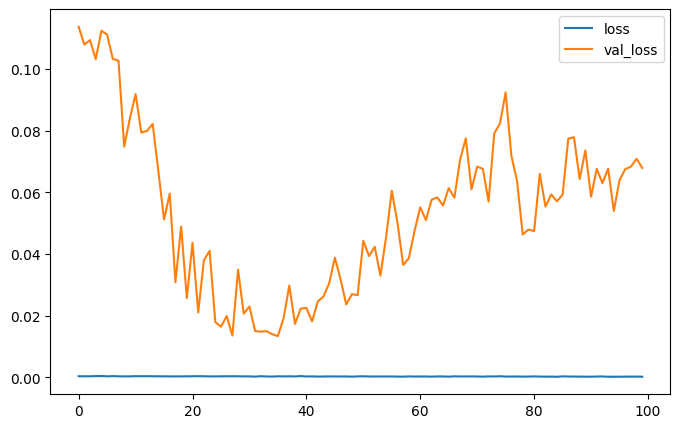

In [31]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [32]:
best_model_accuracy = history.history['loss'][np.argmin(history.history['loss'])]
print(best_model_accuracy)

0.0002144652244169265


# 300 epochs, Adam optimizer, 64 batches size, tanh activation function

In [33]:
batch_size=64
epochs= 300
history2= model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=epochs, verbose=1, batch_size=batch_size)

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 2.5399e-04 - val_loss: 0.0682
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 2.2127e-04 - val_loss: 0.0725
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 2.4485e-04 - val_loss: 0.0674
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 2.0722e-04 - val_loss: 0.0697
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 1.8272e-04 - val_loss: 0.0713
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 2.2199e-04 - val_loss: 0.0714
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 2.2927e-04 - val_loss: 0.0769
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 2.8721e-04 - val_loss: 0.0795
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 2.5633e-04 - val_loss: 0.0831
Epoch 10/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 2.2889e-04 - val_loss: 0.0771
Epoch 11/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 2.5839e-04 - val_loss: 0.0867
Epoch 12/300
4/4 ━━━━━━━

best loss in this model:  0.00010556919005466625


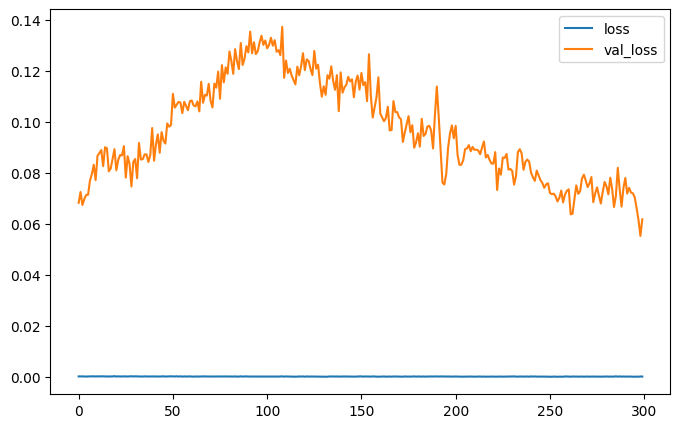

In [34]:
show_history(history2)

# 300 epochs, SGD optimizer, 32 batches, sigmoid activation function, 0.3 dropout

In [35]:
model2 = Sequential()
model2.add(LSTM(50, dropout=0.3, activation="sigmoid", return_sequences= True, input_shape= (window_size,1)))
model2.add(LSTM(50, dropout=0.3, activation="sigmoid", return_sequences=True))
model2.add(LSTM(50))
model2.add(Dense(1))
model2.compile(loss = 'mean_squared_error', optimizer = 'sgd')

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 30, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 30, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
batch_size=32
epochs= 300
history3= model2.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=epochs, verbose=1, batch_size=batch_size)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 188ms/step - loss: 0.1040 - val_loss: 0.1909
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0012 - val_loss: 0.1884
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0011 - val_loss: 0.1847
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0011 - val_loss: 0.1893
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0012 - val_loss: 0.1883
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0011 - val_loss: 0.1896
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 8.9835e-04 - val_loss: 0.1812
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0012 - val_loss: 0.1840
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 9.6791e-04 - val_loss: 0.1890
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0013 - val_loss: 0.1857
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0011 - val_loss: 0.1848
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0011

best loss in this model:  0.0006762495613656938


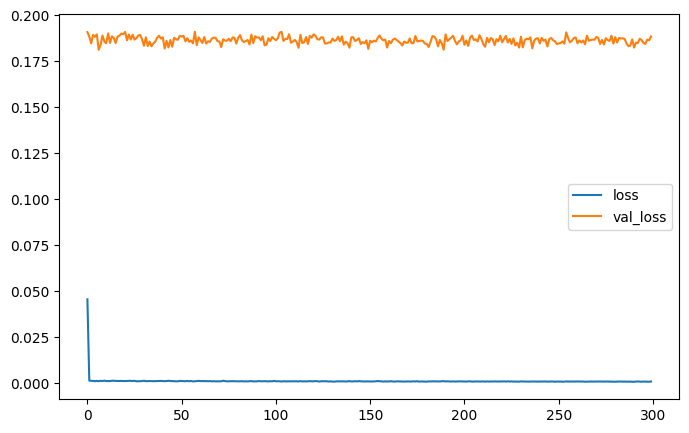

In [37]:
show_history(history3)